In [1]:
!pip install opencv-python
!pip install matplotlib
#!pip install tensorflow==2.2.0
!pip install pillow

In [48]:
import os
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [49]:
train_dir = 'E:\desarrollos\observations\experiements\data'
train_mask_dir = os.path.join(train_dir, 'with_mask')
train_no_mask_dir = os.path.join(train_dir, 'without_mask')

In [50]:
train_mask_fnames = os.listdir(train_mask_dir)
train_no_mask_fnames = os.listdir(train_no_mask_dir)
print(train_mask_fnames[:10])
print(train_no_mask_fnames[:10])

['0-with-mask.jpg', '1-with-mask.jpg', '10-with-mask.jpg', '100-with-mask.jpg', '101-with-mask.jpg', '103-with-mask.jpg', '104-with-mask.jpg', '105-with-mask.jpg', '106-with-mask.jpg', '107-with-mask.jpg']
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


In [51]:
print('Total imagenes con mascara: ', len(os.listdir(train_mask_dir)))
print('Total imagenes sin mascara: ', len(os.listdir(train_no_mask_dir)))

Total imagenes con mascara:  690
Total imagenes sin mascara:  686


In [52]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [53]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_height = 150
img_width = 150
batch_size = 10
train_datagen = ImageDataGenerator(rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')

Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


In [55]:
np_epochs = 10
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = np_epochs
)

Epoch 1/10
110/110 [==============================] - 18s 168ms/step - loss: 0.4152 - acc: 0.8075 - val_loss: 0.1657 - val_acc: 0.9407
Epoch 2/10
110/110 [==============================] - 17s 158ms/step - loss: 0.0961 - acc: 0.9716 - val_loss: 0.2652 - val_acc: 0.9185
Epoch 3/10
110/110 [==============================] - 21s 193ms/step - loss: 0.0860 - acc: 0.9753 - val_loss: 0.1001 - val_acc: 0.9704
Epoch 4/10
110/110 [==============================] - 22s 201ms/step - loss: 0.0736 - acc: 0.9688 - val_loss: 0.0693 - val_acc: 0.9778
Epoch 5/10
110/110 [==============================] - 31s 278ms/step - loss: 0.0844 - acc: 0.9716 - val_loss: 0.0924 - val_acc: 0.9741
Epoch 6/10
110/110 [==============================] - 26s 238ms/step - loss: 0.0432 - acc: 0.9826 - val_loss: 0.0814 - val_acc: 0.9667
Epoch 7/10
110/110 [==============================] - 18s 164ms/step - loss: 0.0370 - acc: 0.9863 - val_loss: 0.0609 - val_acc: 0.9741
Epoch 8/10
110/110 [==============================] - 2

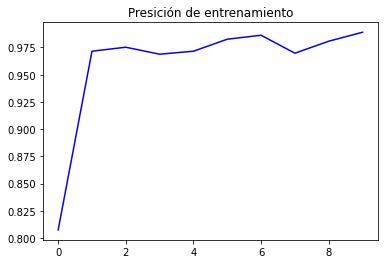

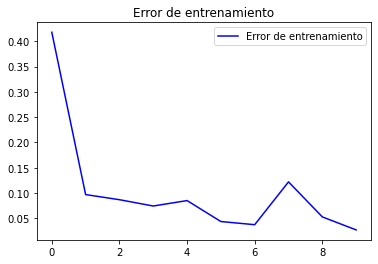

In [56]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Presición de entrenamiento')
plt.title('Presición de entrenamiento')

plt.figure()

plt.plot(epochs, loss, 'b', label='Error de entrenamiento')
plt.title('Error de entrenamiento')
plt.legend()

plt.show()

In [57]:
from tensorflow.keras.preprocessing import image
from PIL import Image

Si lleva mascara


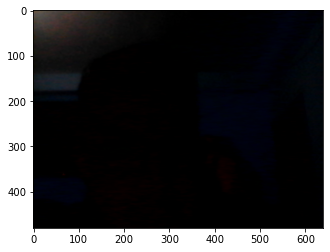

No Lleva mascara


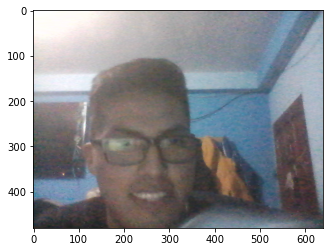

No Lleva mascara


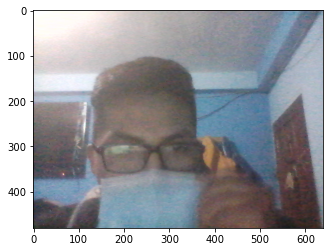

No Lleva mascara


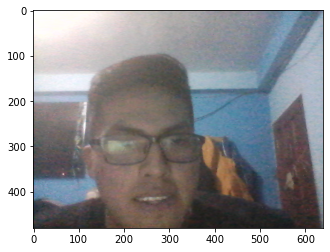

No Lleva mascara


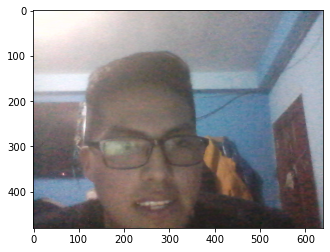

No Lleva mascara


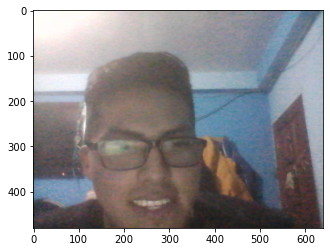

No Lleva mascara


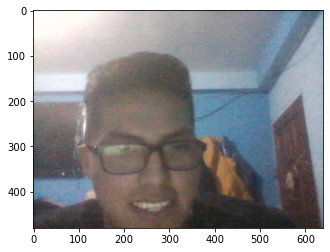

No Lleva mascara


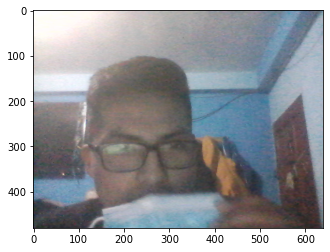

Si lleva mascara


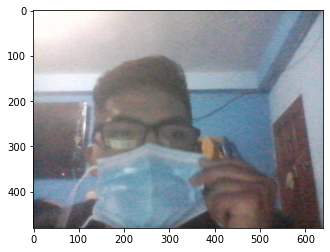

Si lleva mascara


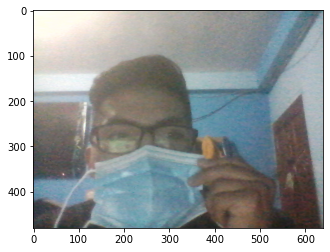

Si lleva mascara


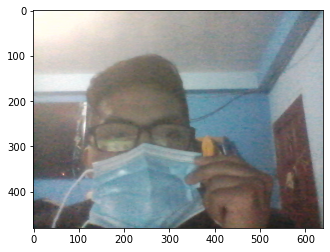

Si lleva mascara


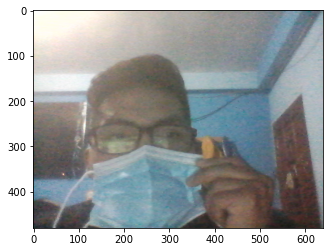

No Lleva mascara


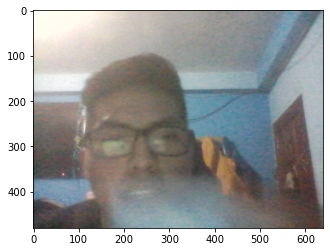

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [63]:
vc = cv2.VideoCapture(0)
plt.ion()
if vc.isOpened():
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    webcam_preview = plt.imshow(frame)
else:
    is_capturing = False
frame_index = 1
while is_capturing:
    try:    
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    
        frame_res = cv2.resize(frame, dsize=(150, 150), interpolation=cv2.INTER_CUBIC) #Lee el mismo size que espera el modelo y te ahorra reshapes
        x=image.img_to_array(frame_res)
        x=np.expand_dims(x, axis=0)
        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        if classes[0]>0:
            print("No Lleva mascara")
        else:
            print("Si lleva mascara")
        webcam_preview = plt.imshow(frame)
        try:    
            plt.pause(1)
        except Exception:
            pass
    except KeyboardInterrupt:
        vc.release()